SuperMarket Dataset

https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales/data

Initial Checking of the Dataset 
- Display the first few rows of the dataset.
- Show the data types and check for the presence of missing values.

In [26]:
import pandas as pd

# Load the dataset
df = pd.read_csv('supermarket_sales - Sheet1.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()


Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

Part 1 of EDA 
- Basic Information about the Dataset
    - structure of the dataset including the number of entries
    - the total number of columns
    - the type of each column
    - the number of non-null values
- Descriptive Statistics for Numerical Variables
    - generate descriptive statistics that summarize the central tendency
    - the shape of the dataset's numerical features' distribution, excluding NaN values
- Distribution of Categorical Variables
    - Identifies categorical columns &
          - summarize the count, unique values, top values, and frequency of top values
- Checking for Missing Values
- Select numerical columns and compute the pairwise correlation between them
- Visual EDA - Sales Distribution by Product Line
- Visual EDA - Average Rating by Product Line

In [10]:
import pandas as pd

df_detailed_eda = pd.read_csv('supermarket_sales - Sheet1.csv')

# Basic information about the dataset
basic_info = df_detailed_eda.info()

# Descriptive statistics for numerical variables
descriptive_stats = df_detailed_eda.describe()

# Understanding the distribution of categorical variables
categorical_columns = df_detailed_eda.select_dtypes(include=['object']).columns
categorical_distribution = df_detailed_eda[categorical_columns].describe()

# Checking for missing values in the dataset
missing_values = df_detailed_eda.isnull().sum()

# Explore correlations between numerical variables
numeric_columns = df_detailed_eda.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Visual EDA: For a few selected visual explorations
# 1. Sales distribution by Product Line
sales_distribution_by_product = df_detailed_eda.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# 2. Average rating by Product Line
average_rating_by_product = df_detailed_eda.groupby('Product line')['Rating'].mean().sort_values(ascending=False)

# Print results
print("Basic Information:")
print(basic_info)  # Since df.info() prints by itself, this may be redundant unless you need it specifically formatted
print("\nDescriptive Statistics:\n", descriptive_stats)
print("\nCategorical Distribution:\n", categorical_distribution)
print("\nMissing Values:\n", missing_values)
print("\nCorrelation Matrix:\n", correlation_matrix)
print("\nSales Distribution by Product Line:\n", sales_distribution_by_product)
print("\nAverage Rating by Product Line:\n", average_rating_by_product)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Part 2 EDA: Visualization

Making of bar chart 
- Sales Distribution by Product Line: 
    - This visualization will help one understand which product lines are generating the most sales.


C:\Users\swadh\AppData\Local\Temp\ipykernel_19632\1870176229.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product line', y='Total', data=df, estimator=sum, ci=None)


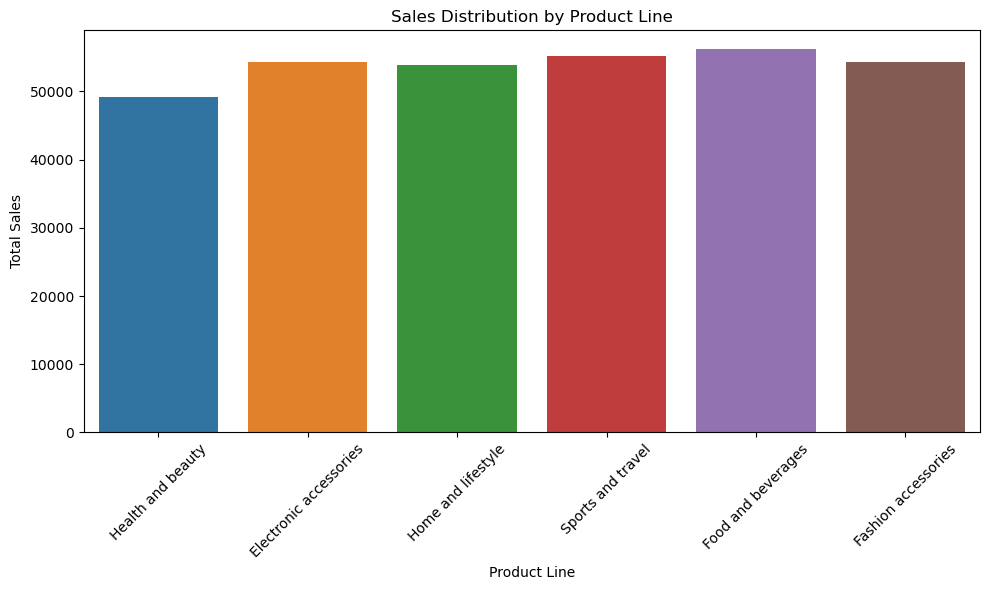

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Total', data=df, estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title('Sales Distribution by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.tight_layout()


Part 2 EDA: Visualization 

Making of bar chart

- Average Rating by Product Line: 
    - This chart will give you an idea of customer satisfaction across different product lines.


In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Rating', data=df, ci=None)
plt.xticks(rotation=45)
plt.title('Average Rating by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.tight_layout()


C:\Users\swadh\AppData\Local\Temp\ipykernel_19632\1304448479.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product line', y='Rating', data=df, ci=None)


Part 2 EDA: Visualization 

Making of bar chart
-Monthly Sales Trends:
    - To analyze the sales trends over time, it's helpful to see how sales have fluctuated every month.

In [7]:

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Total'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)  # Convert to string for plotting

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()


C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Part 2 EDA: Visualization

Histograms
- Unit Price
- Quantity
- Total Sales
- Ratings

C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

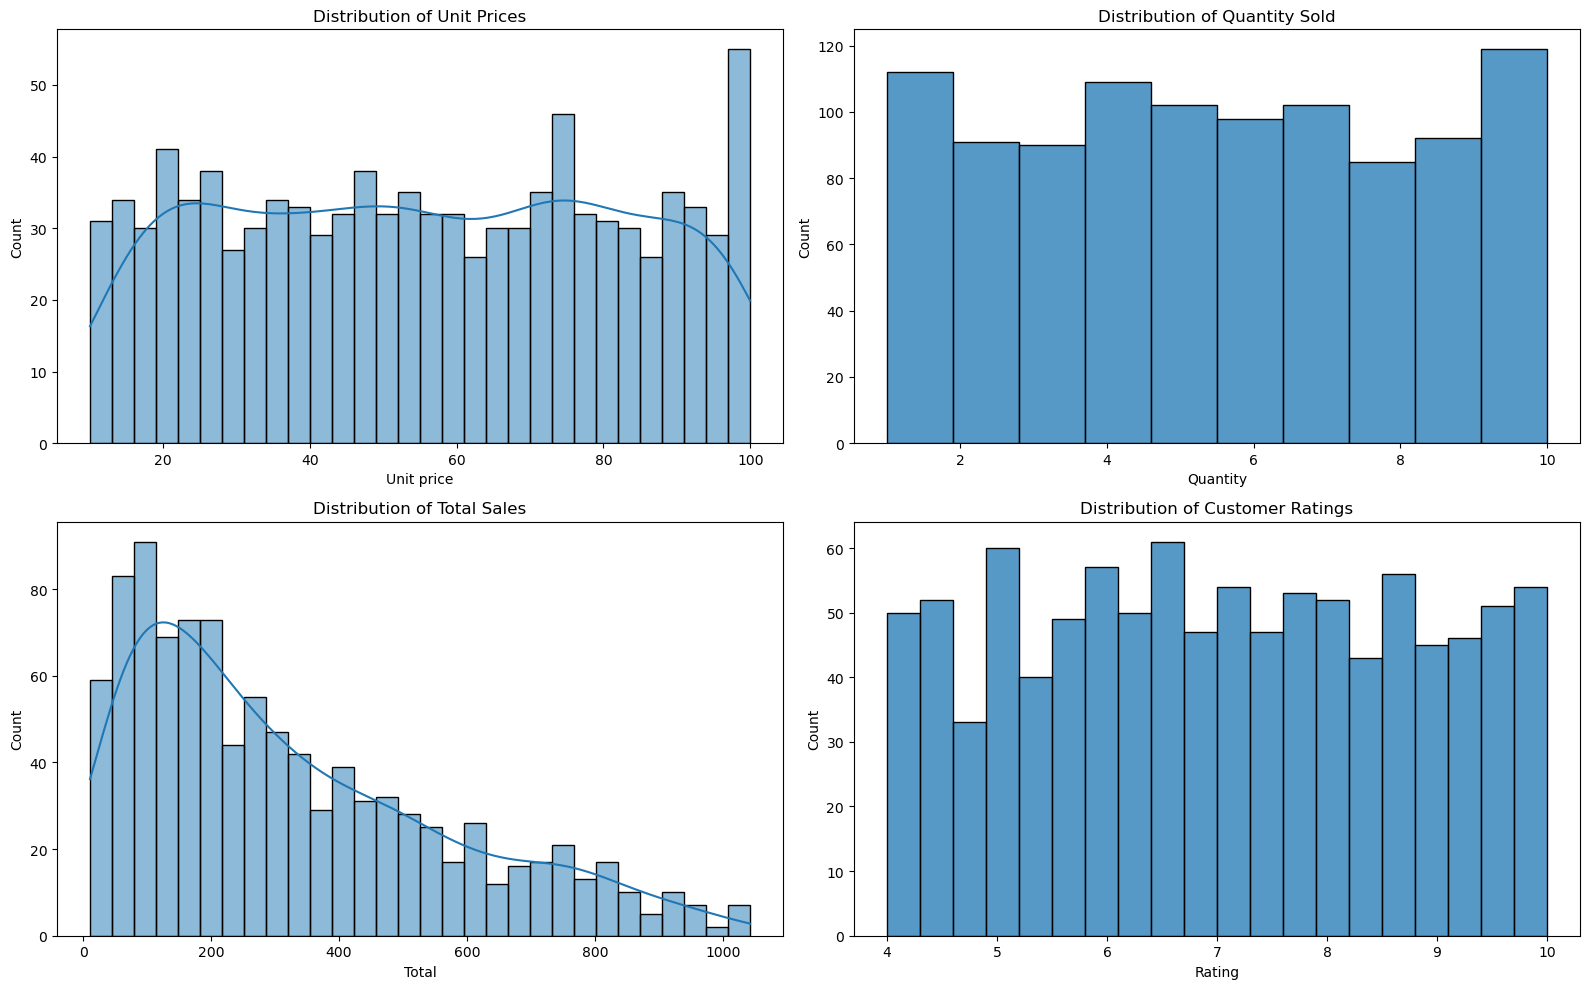

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_visual_eda = pd.read_csv('supermarket_sales - Sheet1.csv')

plt.figure(figsize=(16, 10))

# Histogram of Unit Price
plt.subplot(2, 2, 1)
sns.histplot(df_visual_eda['Unit price'], kde=True, bins=30)
plt.title('Distribution of Unit Prices')

# Histogram of Quantity
plt.subplot(2, 2, 2)
sns.histplot(df_visual_eda['Quantity'], bins=10)
plt.title('Distribution of Quantity Sold')

# Histogram of Total Sales
plt.subplot(2, 2, 3)
sns.histplot(df_visual_eda['Total'], kde=True, bins=30)
plt.title('Distribution of Total Sales')

# Histogram of Ratings
plt.subplot(2, 2, 4)
sns.histplot(df_visual_eda['Rating'], bins=20)
plt.title('Distribution of Customer Ratings')

plt.tight_layout()
plt.show()


Part 2 EDA: Visualization

- Filters the DataFrame df to include only columns that contain numeric data types. 
    - This is useful for focusing analysis on quantifiable data and preparing for statistical computations.
- Heatmap of the correlation matrix
    - create a heatmap of the correlation matrix derived from the numeric columns of the DataFrame                                                                             

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('supermarket_sales - Sheet1.csv')

# Drop non-numeric columns or select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Create heatmap of the correlation matrix
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Part 2 EDA: Visualization

- BoxPlot of Product line & Ratings

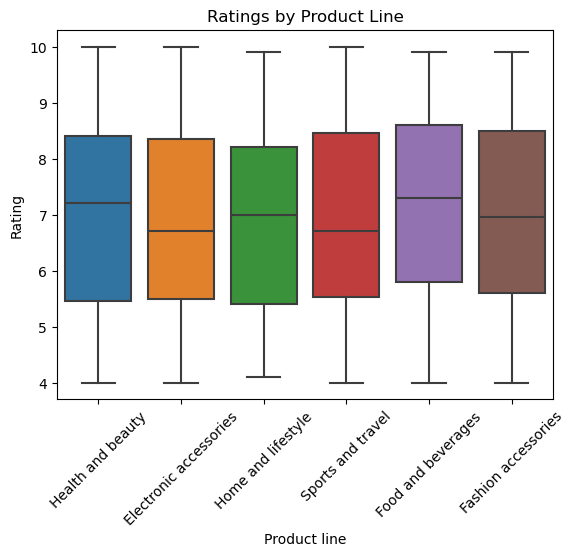

In [20]:
sns.boxplot(x='Product line', y='Rating', data=df)
plt.xticks(rotation=45)
plt.title('Ratings by Product Line')
plt.show()


Part 2 EDA: Visualization

- Pairplot:
    - Total 
    - Unit Price 
    - Quantity 
    - Rating 


C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

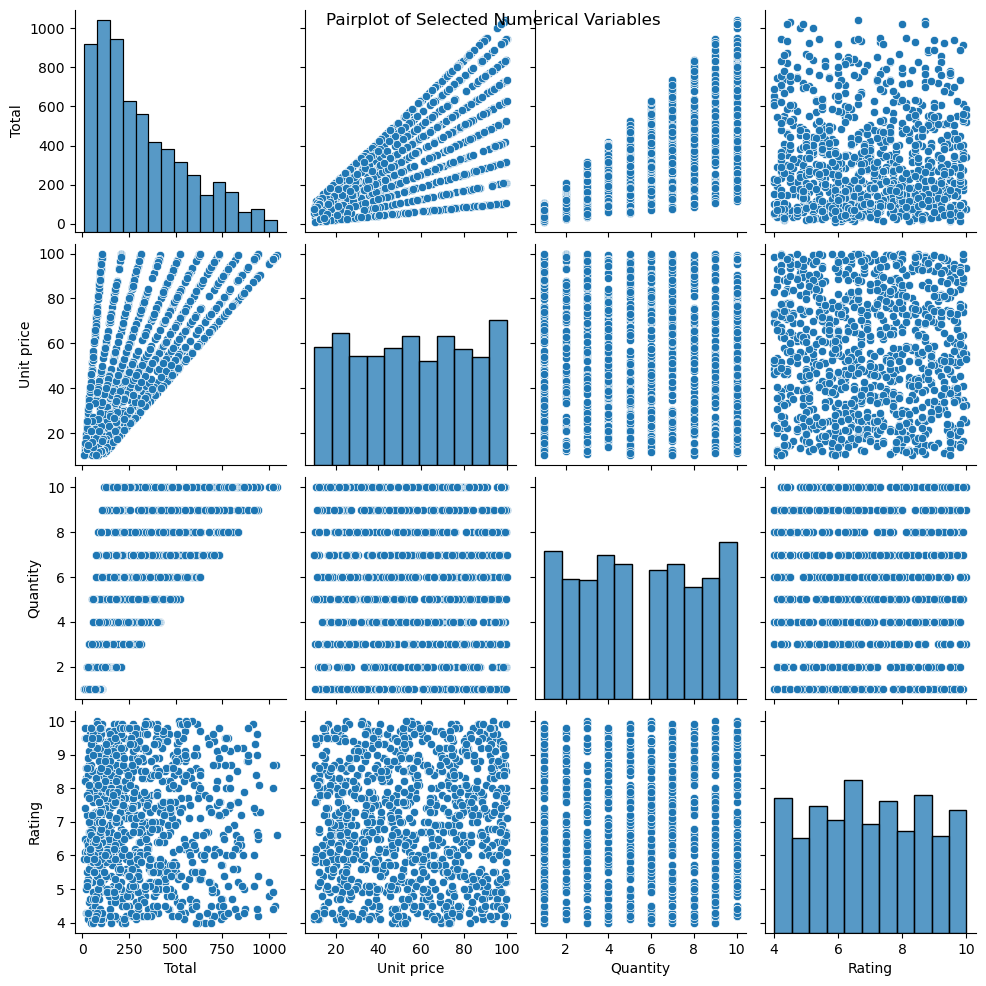

In [24]:
sns.pairplot(df[['Total', 'Unit price', 'Quantity', 'Rating']])
plt.suptitle('Pairplot of Selected Numerical Variables', verticalalignment='top')
plt.show()

Holdout Validation 


Part 1: Data Loading and Preprocessing

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

df_holdout = pd.read_csv('supermarket_sales - Sheet1.csv')

# Selecting features and target for the experiment
X = df_holdout[['Unit price', 'Quantity']]  # Features
y = df_holdout['Total']  # Target



Holdout Validation 

Part 2: Dataset Splitting
- the dataset is divided into training and testing sets
    - 80% of the data to the training set and 20% to the testing set
- random seed (random_state=42) is used for reproducibility

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Holdout Validation 

Part 3: Model Training and Prediction

Linear Regression: 
- trained on the selected features to predict the 'Total' sales

Polynomial Regression:
 - Transformed into their polynomial forms to allow for non-linear modeling, with a polynomial degree of 2

Ridge Regression:
- Trained on the original features to predict 'Total' sales

In [30]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Polynomial Regression Model
# Transforming features for polynomial regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, y_train)
y_pred_polynomial = polynomial_model.predict(X_test_poly)

# Ridge Regression Model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

Holdout Validation 

Part 4: Evaluation of Models and printing results 

In [31]:
# Evaluating the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_polynomial = mean_squared_error(y_test, y_pred_polynomial)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_polynomial = mean_absolute_error(y_test, y_pred_polynomial)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

rmse_linear = np.sqrt(mse_linear)
rmse_polynomial = np.sqrt(mse_polynomial)
rmse_ridge = np.sqrt(mse_ridge)

# Compiling the results
results = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression'],
    'MSE': [mse_linear, mse_polynomial, mse_ridge],
    'MAE': [mae_linear, mae_polynomial, mae_ridge],
    'RMSE': [rmse_linear, rmse_polynomial, rmse_ridge]
}

results_df = pd.DataFrame(results)
results_df


Model           MSE           MAE          RMSE
0      Linear Regression  6.228046e+03  5.853705e+01  7.891797e+01
1  Polynomial Regression  1.723670e-24  1.009042e-12  1.312886e-12
2       Ridge Regression  6.228427e+03  5.853947e+01  7.892038e+01

Cross Validation 


Part1: Data Preparation: 
- Split it into features (X) and the target variable (y)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


# Define models
linear_model = LinearRegression()
polynomial_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
ridge_model = Ridge()

Cross Validation 

Part 2: Cross-Validation Setup

In [33]:
# Define scoring metric as negative mean squared error for simplicity; for RMSE, you would need to compute it from MSE scores
scoring = 'neg_mean_squared_error'

Cross Validation 

Part 3: Execute Cross-Validation

In [34]:
# Perform cross-validation
scores_linear = cross_val_score(linear_model, X, y, cv=5, scoring=scoring)
scores_polynomial = cross_val_score(polynomial_model, X, y, cv=5, scoring=scoring)
scores_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring=scoring)

Cross Validation 


Part 4: Aggregating Results & Printing 

In [37]:
# Calculate mean scores
mse_linear = -np.mean(scores_linear)
mse_polynomial = -np.mean(scores_polynomial)
mse_ridge = -np.mean(scores_ridge)

#compute RMSE from MSE for a more interpretable metric
rmse_linear = np.sqrt(mse_linear)
rmse_polynomial = np.sqrt(mse_polynomial)
rmse_ridge = np.sqrt(mse_ridge)

# Compile and display results
results = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression'],
    'MSE': [mse_linear, mse_polynomial, mse_ridge],
    'RMSE': [rmse_linear, rmse_polynomial, rmse_ridge]
}

results_df = pd.DataFrame(results)
results_df


Model           MSE          RMSE
0      Linear Regression  6.732898e+03  8.205424e+01
1  Polynomial Regression  3.392325e-25  5.824367e-13
2       Ridge Regression  6.732909e+03  8.205431e+01

Bootstrapping 

Part 1: Importing Libraries and Loading Data

In [38]:
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
df_bootstrap = pd.read_csv('supermarket_sales - Sheet1.csv')

Bootstrapping 

Part 2: Data Preparation
- Feature and Target Selection
    - Defines the features (X) and target (y) for the regression models

In [39]:
# Prepare data
X = df_bootstrap[['Unit price', 'Quantity']]  # predictors
y = df_bootstrap['Total']  # target

Bootstrapping 

Part 3: Set up bootstrap
- Specifies how many bootstrap samples to generate and the size of each sample

In [40]:
# Set up bootstrap
n_iterations = 1000  # Number of bootstrap samples to create
n_size = int(len(df_bootstrap) * 0.7)  # Size of each sample (70% of the data)

Bootstrapping 

Part 4: Model Definition

In [41]:
# Models
linear_model = LinearRegression()
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
ridge_model = Ridge()

Bootstrapping 

Part 5: Running Bootstrap
- Resampling and Model Evaluation
    - For each iteration, a sample is drawn with replacement from the original dataset to form a training set.
    - The rest of the data forms the test set.
    - Each model is then fitted on the training set and evaluated on the test set. 

In [ ]:
# Store results
stats = {
    'linear': {'mse': [], 'mae': [], 'rmse': []},
    'polynomial': {'mse': [], 'mae': [], 'rmse': []},
    'ridge': {'mse': [], 'mae': [], 'rmse': []}
}

# Run bootstrap
for _ in range(n_iterations):
    # Prepare train and test sets
    train = resample(df_bootstrap, n_samples=n_size)  # Bootstrap sample
    test = df_bootstrap.loc[~df_bootstrap.index.isin(train.index)]  # Out of bag samples
    
    # Separate predictors and target
    X_train, y_train = train[['Unit price', 'Quantity']], train['Total']
    X_test, y_test = test[['Unit price', 'Quantity']], test['Total']
    
    # Fit models
    linear_model.fit(X_train, y_train)
    poly_model.fit(X_train, y_train)
    ridge_model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred_linear = linear_model.predict(X_test)
    y_pred_poly = poly_model.predict(X_test)
    y_pred_ridge = ridge_model.predict(X_test)

Bootstrapping

Part 6: Evaluating each model and printing the results

In [43]:
    # Calculate metrics
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    
    mae_linear = mean_absolute_error(y_test, y_pred_linear)
    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
    
    rmse_linear = np.sqrt(mse_linear)
    rmse_poly = np.sqrt(mse_poly)
    rmse_ridge = np.sqrt(mse_ridge)
    
    # Append results
    stats['linear']['mse'].append(mse_linear)
    stats['linear']['mae'].append(mae_linear)
    stats['linear']['rmse'].append(rmse_linear)
    
    stats['polynomial']['mse'].append(mse_poly)
    stats['polynomial']['mae'].append(mae_poly)
    stats['polynomial']['rmse'].append(rmse_poly)
    
    stats['ridge']['mse'].append(mse_ridge)
    stats['ridge']['mae'].append(mae_ridge)
    stats['ridge']['rmse'].append(rmse_ridge)

# Calculating the average of the metrics
results = {
    'Model': ['Linear', 'Polynomial', 'Ridge'],
    'MSE': [np.mean(stats['linear']['mse']), np.mean(stats['polynomial']['mse']), np.mean(stats['ridge']['mse'])],
    'MAE': [np.mean(stats['linear']['mae']), np.mean(stats['polynomial']['mae']), np.mean(stats['ridge']['mae'])],
    'RMSE': [np.mean(stats['linear']['rmse']), np.mean(stats['polynomial']['rmse']), np.mean(stats['ridge']['rmse'])]
}

results_df = pd.DataFrame(results)
results_df


Model           MSE           MAE          RMSE
0      Linear  6.751931e+03  6.185193e+01  8.214824e+01
1  Polynomial  7.097274e-25  5.734480e-13  7.135339e-13
2       Ridge  6.751901e+03  6.185176e+01  8.214806e+01